## 1. regression

Set : $y = X \cdot w + b + \epsilon = X \cdot w + \epsilon$
- assume for 1 observative : x = (1, x), w = (b, w)

We know:  (here, v and X is constant about w)

$$\begin{align}
\cfrac {\partial}{\partial w} \left( v^T \cdot w \right) &= v \\
\cfrac {\partial}{\partial w} \left( w^T \cdot v \right) &= v \\
(w^T \cdot X)^T &= X^T \cdot w \\
\cfrac {\partial}{\partial w} \left( w^T \cdot X \cdot w \right) &= X \cdot w + X^T \cdot w
\end{align}$$

So, We solve: y.shape = (N, ), X.shape=(N, p+1), w.shape = (p+1, )

$$\begin{align}
y &= X \cdot w + \epsilon = \hat y + \epsilon\\
Loss(w) &= \epsilon ^2 =||y - \hat y||^2 = (y - X \cdot w)^T \cdot (y - X \cdot w)\\
\cfrac {\partial Loss}{\partial w} &= 2 (X^T \cdot X) \cdot w - 2X^T \cdot y = 0 
\end{align}$$

We get $\hat w$ :
$$ \left| {\cfrac {\partial Loss}{\partial w}} \right|_{w = \hat w} = 0 \Rightarrow 
\hat w = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

### 1.1 Using statistical tool

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
bunch = load_iris()
bunch.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
bunch

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
bunch.data.shape

(150, 4)

In [4]:
iris = pd.DataFrame(bunch.data, columns=bunch.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris.columns = ['sl', 'sw', 'pl', 'pw']
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sl    150 non-null float64
sw    150 non-null float64
pl    150 non-null float64
pw    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


petal width를 target으로 회귀식을 생성해보자.

In [7]:
' + '.join(iris.columns[:3])

'sl + sw + pl'

In [8]:
# formula = 'y ~ x1 + x2 + x3'
features = iris.columns
formula = '%s ~ '%iris.columns[3]
formula += ' + '.join(iris.columns[:3])
formula

'pw ~ sl + sw + pl'

In [9]:
import statsmodels.formula.api as smf

model = smf.ols(formula = formula, data = iris)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pw   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           7.83e-88
Time:                        15:18:20   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2403      0.178     -1.347      0.180      -0.593       0.112
sl            -0.2073      0.048     -4.363      0.000      -0.301      -0.113
sw             0.2228      0.049      4.553      0.000       0.126       0.320
pl             0.5241      0.024     21.399      0.000       0.476       0.572
==============================================================================
Omnibus:                        5.609   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                6.811
Skew:                           0.223   Prob(JB):                       0.0332
Kurtosis:                       3.944   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
result.params

Intercept   -0.240307
sl          -0.207266
sw           0.222829
pl           0.524083
dtype: float64

### 1.2 Using numpy with linear algebra
Now, we'll compute with numpy :
$$ \hat w =  (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In [12]:
from sklearn.datasets import load_iris
X, _ = load_iris(return_X_y = True)
X.shape

(150, 4)

Set : $y = X \cdot w + b + \epsilon = X \cdot w + \epsilon$
- assume: x = (1, x), w = (b, w). So,
- y = X[:, 3]
- X = np.hstack(np.ones(shape), X[:, :3])

And then, you can use numpy.linalg.inv for inverse matrix.

In [13]:
y = X[:, 3]
X = np.hstack((np.ones((X.shape[0], 1)), X[:, :3]))
y.shape, X.shape

((150,), (150, 4))

$$\hat w =  (X^T \cdot X)^{-1} \cdot X^T \cdot y$$

In [14]:
# X's covariant's inverse
from numpy.linalg import inv
invCov_X = inv(X.T.dot(X))
w = invCov_X.dot(X.T).dot(y)
w

array([-0.24030739, -0.20726607,  0.22282854,  0.52408311])

In [15]:
result.params.values

array([-0.24030739, -0.20726607,  0.22282854,  0.52408311])

### 1.3 Machine Learning Method

In [16]:
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 ])

In [18]:
EPOCH = 20000 # 50000
batch = 16
lr = 0.0001 # 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    loss = 0
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        y_hat = x_batch.dot(w)
        loss += (y_batch - y_hat).dot((y_batch - y_hat))
        dw = X.T.dot(X).dot(w) - X.T.dot(y) # = d Loss(w) / d(w)
        w -= lr*dw
        
    loss /= rows
    losses.append(loss)

$$\begin{align}
Loss(w) &= (y - X \cdot w)^T \cdot (y - X \cdot w)\\
\cfrac {\partial Loss}{\partial w} &= 2 (X^T \cdot X) \cdot w - 2X^T \cdot y 
\end{align}$$

In [19]:
w

array([-0.24030739, -0.20726607,  0.22282854,  0.52408311])

In [20]:
result.params.values

array([-0.24030739, -0.20726607,  0.22282854,  0.52408311])

In [21]:
import pandas as pd
#matplotlib inline
loss_df = pd.DataFrame(losses)
loss_df[:100].plot()

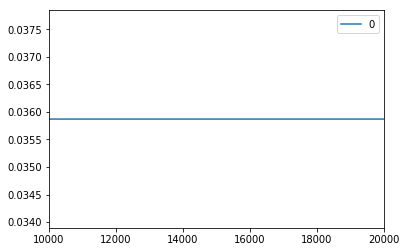

In [22]:
loss_df[10000:].plot()

## 2. classification
We consider binary classification, and want to predict not directly <font color='red'>y</font> but <font color='blue'>p(y=1)</font>.

We Set:

$$\begin{align}
\hat y &= P(y=1) = \sigma(X \cdot w) \\
\sigma(z) &= \cfrac 1 {1+\exp(-z)}\\
\cfrac {\partial \sigma(z)}{\partial z} &= \cfrac {\exp(-z)} {(1+\exp(-z))^2} = \sigma(z)(1-\sigma(z))\\
Loss(w) &= NLL(w) 
= - \left[ y^T \cdot \log P(y=1) \right] - \left[ (1-y)^T \cdot \log (1-P(y=1)) \right] \\
\cfrac {\partial Loss}{\partial w} &= - X^T \cdot \left[ y (1 - P(y=1)) \right] + X^T \cdot \left[(1-y) P(y=1) \right] \\
&= X^T \cdot (\hat y - y)
\end{align}$$

### 2.1 statistical tool
binary case만을 고려하기 위해, 첫 100개 항만 가져오도록 하자.

In [23]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=4, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=4)
print(X.shape)
X[:5]

(100, 4)


array([[-0.31629979,  0.70803893, -2.29291305,  0.28220666],
       [-0.67690095, -0.77936232, -1.12511459, -0.85295128],
       [ 2.70496343,  1.81256131,  0.09005406,  0.62008331],
       [ 0.5868326 ,  0.36681905, -0.45731792, -0.46723319],
       [ 0.65746416, -1.15725619, -0.03396529, -0.40039299]])

In [24]:
import statsmodels.api as sm
X = sm.add_constant(X)
print(X.shape)
X[:5]

(100, 5)


array([[ 1.        , -0.31629979,  0.70803893, -2.29291305,  0.28220666],
       [ 1.        , -0.67690095, -0.77936232, -1.12511459, -0.85295128],
       [ 1.        ,  2.70496343,  1.81256131,  0.09005406,  0.62008331],
       [ 1.        ,  0.5868326 ,  0.36681905, -0.45731792, -0.46723319],
       [ 1.        ,  0.65746416, -1.15725619, -0.03396529, -0.40039299]])

In [25]:
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.124262
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Tue, 24 Dec 2019   Pseudo R-squ.:                  0.8207
Time:                        15:20:01   Log-Likelihood:                -12.426
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 1.161e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3037      0.603      0.503      0.615      -0.879       1.486
x1            -1.0410      0.731     -1.423      0.155      -2.474       0.392
x2             5.6889      1.538      3.700      0.000       2.675       8.703
x3            -0.2788      0.553     -0.504      0.614      -1.363       0.805
x4            -0.8798      0.659     -1.336      0.182      -2.171       0.411
==============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [26]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

### 2.2 Using numpy with linear algebra
can't get exact solution, but approximation method with Hessian Matrix

### 2.3 Machine Learning Method
#### 1) SGD(확률적 경사하강법)

In [27]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [28]:
EPOCH = 150000 # 50000
batch = 34 # 2^n이 좋으나 데이터가 100개라 1/3로 함
lrs = [0.0005, 0.00005, 0.00001]
rows = X.shape[0]
losses = []
randRow = np.arange(rows)

def sigma(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    epochLoss = 0
    if epoch < 50000:
        lr = lrs[0]
    elif epoch < 100000:
        lr = lrs[1]
    else: lr = lrs[2]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        # 아래는 직접 구현해보세요.
        pass

$$\begin{align}
\hat y &= P(y=1) = \sigma(X \cdot w) \\
Loss(w) &= NLL(w) 
= - \left[ y^T \cdot \log P(y=1) \right] - \left[ (1-y)^T \cdot \log (1-P(y=1)) \right] \\
\cfrac {\partial Loss}{\partial w} &= X^T \cdot (\hat y - y)
\end{align}$$

In [29]:
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [30]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

#### 2) 모멘텀 기법 사용하기
<참고> https://twinw.tistory.com/247
![](https://t1.daumcdn.net/cfile/tistory/99A14F455B0CF54C21)

```
v(t+1) = m * v(t) - a * dW(t)
W(t+1) = W(t) + v(t+1)

v(0) = 0, m = 0.9
v(1) = - a * dW(0)
W(1) = W(0) + v(1) = W(0) - a * dW(0)

v(2) = m * v(1) - a * dW(1) = - 0.9 * a * dW(0) - a * dW(1)
W(2) = W(1) - a * [ 0.9 * dW(0) + dW(1) ]

v(3) = m * v(2) - a * dW(2) = - a * [ 0.9 * 0.9 * dW(0) + 0.9 * dW(1) + dW(2) ]
W(3) = W(2) + v(3) = W(2) - a * [ 0.9 * 0.9 * dW(0) + 0.9 * dW(1) + dW(2) ]
```
- a: learning rate
- m: momentum. memory of prior velocity. generally 0.9 ~ 0.99
- v: velocity. moving speed and direction.

```python
v = m * v - learning_rate * dW
W += v
```

In [31]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(123)
w = rand(X.shape[-1]) - 0.5
w

array([ 0.19646919, -0.21386067, -0.27314855,  0.05131477,  0.21946897])

In [32]:
EPOCH = 50000 # 50000
batch = 34
# lrs = [0.0005, 0.00005, 0.00001]
lr = 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = 0

def sigma(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    epochLoss = 0
#     if epoch < 50000:
#         lr = lrs[0]
#     elif epoch < 100000:
#         lr = lrs[1]
#     else: lr = lrs[2]
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        pass

In [33]:
w

array([ 0.19646919, -0.21386067, -0.27314855,  0.05131477,  0.21946897])

In [34]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

#### 3) Nesterov 기법 사용하기
![](https://t1.daumcdn.net/cfile/tistory/996E494B5B0D03A003)

```python
v = m * v - learning_rate * d(w + m*v)
weight += v
```

In [35]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

array([-0.46903266, -0.24571793,  0.41240044,  0.4701742 , -0.25338022])

In [41]:
EPOCH = 50000 # 50000
batch = 34
# lrs = [0.0005, 0.00005, 0.00001]
lr = 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = 0

def sigma(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    epochLoss = 0
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        y_hat_batch = sigma(x_batch.dot(w))
        loss_batch = - y_batch.T.dot(np.log(y_hat_batch))\
                     - (1 - y_batch).T.dot(np.log(1 - y_hat_batch))
        epochLoss += loss_batch
        dw = x_batch.T.dot((y_hat_batch - y_batch))
        y_hat_batch_next = sigma(x_batch.dot(w + m*v))
        dw_next = x_batch.T.dot((y_hat_batch_next - y_batch))
        v = m*v - lr*dw_next
        w += v
    epochLoss /= rows
    losses.append(epochLoss)

In [42]:
w

array([ 0.30365319, -1.04079873,  5.68893127, -0.27867004, -0.88003032])

In [43]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])

#### 4) RMSprop 사용하기
```python
cache = decay_rate * cache + (1 - decay_rate) * dx**2
x += - learning_rate * dx / (np.sqrt(cache) + eps)
```

In [42]:
import numpy as np
from numpy.random import shuffle, rand
np.random.seed(234)
w = rand(X.shape[-1]) - 0.5
w

5

In [43]:
EPOCH = 50000 # 50000
batch = 34
# lrs = [0.0005, 0.00005, 0.00001]
lr = 0.00005
rows = X.shape[0]
losses = []
randRow = np.arange(rows)
m = 0.95
v = 0
cache=np.zeros(w.size)
decay_rate=0.99
eps=1e-8


def sigma(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(EPOCH):
    # for each epoch, shuffle X, y
    shuffle(randRow)
    epochLoss = 0
    
    for i in range(0, rows, batch):
        batch_index = randRow[i:i+batch]
        x_batch = X[batch_index]
        y_batch = y[batch_index]
        pass

In [44]:
w

array([ 0.18226938, -0.81510438,  5.04788791, -0.18684718, -0.70703686])

In [45]:
result.params

array([ 0.30366162, -1.04095437,  5.68894902, -0.27882206, -0.87983546])